# Retrieve geospatial vector data
## Intro

## Sources
- https://clubedogis.com.br/dados-geoespaciais/?
- IBGE
    - https://www.ibge.gov.br/geociencias/organizacao-do-territorio/malhas-territoriais/
    - https://sidra.ibge.gov.br/home/pog/brasil
    - https://analisemacro.com.br/economia/indicadores/coletando-dados-do-sidra-com-o-python/
    - https://portaldemapas.ibge.gov.br/portal.php#mapa222600
    - https://biblioteca.ibge.gov.br/visualizacao/livros/liv101675.pdf
- MMA
    - http://mapas.mma.gov.br/i3geo/datadownload.htm
- gov.br
    - https://dados.gov.br/home
- https://github.com/geopandas/geodatasets


# Setup

In [15]:
import geopandas as gpd
import geodatasets
import requests

In [7]:
import urllib3
from urllib3.util.ssl_ import create_urllib3_context

ctx = create_urllib3_context()
ctx.load_default_certs()
ctx.options |= 0x4  # ssl.OP_LEGACY_SERVER_CONNECT

# Geodatasets

In [6]:
geodatasets.data

{'geoda': {'airbnb': {'url': 'https://geodacenter.github.io/data-and-lab//data/airbnb.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.airbnb',
   'description': 'Airbnb rentals, socioeconomics, and crime in Chicago',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//airbnb/',
   'hash': 'a2ab1e3f938226d287dd76cde18c00e2d3a260640dd826da7131827d9e76c824',
   'filename': 'airbnb.zip'},
  'atlanta': {'url': 'https://geodacenter.github.io/data-and-lab//data/atlanta_hom.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.atlanta',
   'description': 'Atlanta, GA region homicide counts and rates',
   'geometry_type': 'Polygon',
   'nrows': 90,
   'ncols': 24,
   'details': 'https://geodacenter.github.io/data-and-lab//atlanta_old/',
   'hash': 'a33a76e12168fe84361e60c88a9df4856730487305846c559715c89b1a2b5e09',
   'filename': 'atlanta_hom.zip',
   'members': ['atlanta_hom/atl_hom.geojson']},
  'cars': {'url': 'https://geodacenter.github.io/data-and-lab//data/Abandoned_Vehicles_Map.csv',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.cars',
   'description': '2011 abandoned vehicles in Chicago (311 complaints).',
   'geometry_type': 'Point',
   'nrows': 137867,
   'ncols': 21,
   'details': 'https://geodacenter.github.io/data-and-lab//1-source-and-description/',
   'hash': '6a0b23bc7eda2dcf1af02d43ccf506b24ca8d8c6dc2fe86a2a1cc051b03aae9e',
   'filename': 'Abandoned_Vehicles_Map.csv'},
  'charleston1': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston1',
   'description': '2000 Census Tract Data for Charleston, SC MSA and counties',
   'geometry_type': 'Polygon',
   'nrows': 117,
   'ncols': 31,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston-1_old/',
   'hash': '4a4fa9c8dd4231ae0b2f12f24895b8336bcab0c28c48653a967cffe011f63a7c',
   'filename': 'CharlestonMSA.zip',
   'members': ['CharlestonMSA/sc_final_census2.gpkg']},
  'charleston2': {'url': 'https://geodacenter.github.io/data-and-lab//data/CharlestonMSA2.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.charleston2',
   'description': '1998 and 2001 Zip Code Business Patterns (Census Bureau) for Charleston, SC MSA',
   'geometry_type': 'Polygon',
   'nrows': 42,
   'ncols': 60,
   'details': 'https://geodacenter.github.io/data-and-lab//charleston2/',
   'hash': '056d5d6e236b5bd95f5aee26c77bbe7d61bd07db5aaf72866c2f545205c1d8d7',
   'filename': 'CharlestonMSA2.zip',
   'members': ['CharlestonMSA2/CharlestonMSA2.gpkg']},
  'chicago_health': {'url': 'https://geodacenter.github.io/data-and-lab//data/comarea.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_health',
   'description': 'Chicago Health + Socio-Economics',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 87,
   'details': 'https://geodacenter.github.io/data-and-lab//comarea_vars/',
   'hash': '4e872adb552786eae2fcd745524696e5e4cd33cc9a6c032471c0e75328871401',
   'filename': 'comarea.zip'},
  'chicago_commpop': {'url': 'https://geodacenter.github.io/data-and-lab//data/chicago_commpop.zip',
   'license': 'NA',
   'attribution': 'Center for Spatial Data Science, University of Chicago',
   'name': 'geoda.chicago_commpop',
   'description': 'Chicago Community Area Population Percent Change for 2000 and 2010',
   'geometry_type': 'Polygon',
   'nrows': 77,
   'ncols': 9,
   'details': 'https://geodacenter.github.io/data-and-lab//commpop/',
   'hash': '1dbebb50c8ea47e2279ea819ef64ba793bdee2b88e4716bd6c6ec0e0d8e0e05b',
   'filename': 'c

In [16]:
path = geodatasets.get_path("naturalearth.land")
df = gpd.read_file(path)

<Axes: >

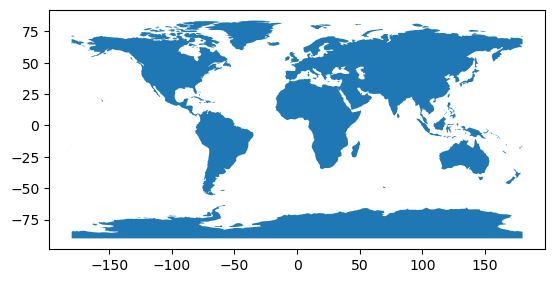

In [18]:
df.plot()

# IBGE

In [13]:

import urllib3
from urllib3.util.ssl_ import create_urllib3_context
# https://stackoverflow.com/questions/71603314/ssl-error-unsafe-legacy-renegotiation-disabled

ctx = create_urllib3_context()
ctx.load_default_certs()
ctx.options |= 0x4  # ssl.OP_LEGACY_SERVER_CONNECT
estado = 'BA'
url = "https://servicodados.ibge.gov.br/api/v3/malhas/estados/{}?formato=application/vnd.geo+json".format(estado)
with urllib3.PoolManager(ssl_context=ctx) as http:
    r = http.request("GET", url)
    geo_json_data = r.json()


In [14]:
geo_json_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Polygon',
    'coordinates': [[[-39.3568, -8.5475],
      [-39.3645, -8.5378],
      [-39.3798, -8.5328],
      [-39.416, -8.5421],
      [-39.4248, -8.5514],
      [-39.4278, -8.5587],
      [-39.4355, -8.5633],
      [-39.4521, -8.5632],
      [-39.4575, -8.5693],
      [-39.4612, -8.582],
      [-39.4761, -8.5928],
      [-39.4857, -8.5964],
      [-39.5186, -8.6039],
      [-39.5262, -8.6125],
      [-39.5455, -8.6207],
      [-39.5567, -8.6231],
      [-39.5686, -8.6367],
      [-39.5809, -8.6405],
      [-39.5952, -8.6512],
      [-39.6145, -8.6575],
      [-39.6226, -8.6555],
      [-39.646, -8.6597],
      [-39.6609, -8.6574],
      [-39.6888, -8.6609],
      [-39.692, -8.6642],
      [-39.693, -8.6805],
      [-39.6823, -8.7115],
      [-39.678, -8.7326],
      [-39.6738, -8.7455],
      [-39.6781, -8.757],
      [-39.6733, -8.7849],
      [-39.6951, -8.7996],
      [-39.7102, -8.7978],
  

In [10]:
import pandas as pd
pd.json_normalize(geo_json_data['features'])

,type,geometry.type,geometry.coordinates,properties.codarea
0,Feature,Polygon,"[[[-47.6797, -18.3561], [-47.694, -18.375], [-...",31
